In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [28]:
from linear_regress import ArModel

ar_model = ArModel(df)
ar_model.train()

Epoch 1/80
25/25 [==============================] - 0s 9ms/step - loss: 1786.6809 - val_loss: 663.7353
Epoch 2/80
25/25 [==============================] - 0s 7ms/step - loss: 359.9922 - val_loss: 180.9367
Epoch 3/80
25/25 [==============================] - 0s 6ms/step - loss: 181.4128 - val_loss: 120.2223
Epoch 4/80
25/25 [==============================] - 0s 6ms/step - loss: 132.8454 - val_loss: 96.4407
Epoch 5/80
25/25 [==============================] - 0s 6ms/step - loss: 109.4196 - val_loss: 88.2744
Epoch 6/80
25/25 [==============================] - 0s 5ms/step - loss: 97.2616 - val_loss: 85.0621
Epoch 7/80
25/25 [==============================] - 0s 5ms/step - loss: 92.0508 - val_loss: 70.4447
Epoch 8/80
25/25 [==============================] - 0s 4ms/step - loss: 90.3396 - val_loss: 68.8521
Epoch 9/80
25/25 [==============================] - 0s 4ms/step - loss: 80.6533 - val_loss: 65.3391
Epoch 10/80
25/25 [==============================] - 0s 4ms/step - loss: 83.6462 - val_loss

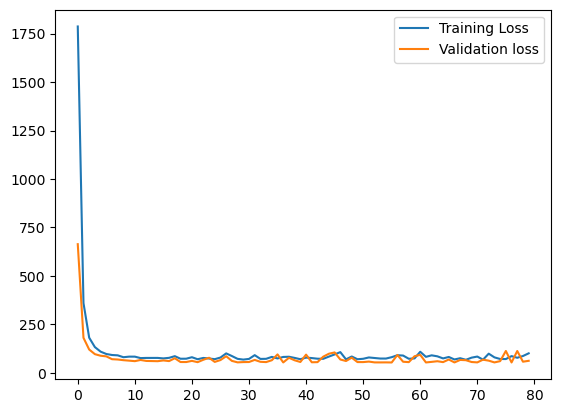

In [29]:
ar_model.plot_train_progress()

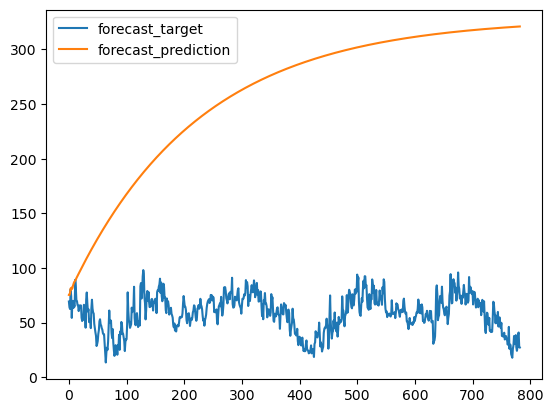

In [30]:
ar_model.plot_validation_pred_target()

In [31]:
# !pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q transformers
!pip install -q datasets
!pip install -q evaluate
!pip install -q accelerate
!pip install -q gluonts ujson

In [32]:
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

ar_mase_results = mase_metric.compute(references=ar_model.validation_target, predictions=ar_model.validation_predictions, training=ar_model.X[0])
ar_smape_metric = smape_metric.compute(references=ar_model.validation_target, predictions=ar_model.validation_predictions)

print(f'MASE: {ar_mase_results}')
print(f'SMAPE: {ar_smape_metric}')

MASE: {'mase': 20.027576573933374}
SMAPE: {'smape': 1.2290521835623254}


In [33]:
from rnn_model import RnnModel

base_model = RnnModel(df, unit_type="base")

In [34]:
base_model.train(epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 23ms/step - loss: 0.0301
Epoch 2/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0111
Epoch 3/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0093
Epoch 4/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0087
Epoch 5/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0080
Epoch 6/100
63/63 [==============================] - 1s 19ms/step - loss: 0.0078
Epoch 7/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0070
Epoch 8/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0068
Epoch 9/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0069
Epoch 10/100
63/63 [==============================] - 1s 19ms/step - loss: 0.0072
Epoch 11/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0066
Epoch 12/100
63/63 [==============================] - 1s 20ms/step - loss: 0.0064
Epoch 13/100
63/63 [=====

In [35]:
import numpy as np
np.array(base_model.validation_predictions)

array([[ 33.334827 ,  60.02912  ,   7.886965 , 997.92346  ],
       [ 33.971886 ,  62.832745 ,   6.9683576, 996.298    ],
       [ 34.19272  ,  65.28475  ,   7.316909 , 995.8097   ],
       ...,
       [ 32.133057 ,  82.51146  ,   5.183077 , 992.32574  ],
       [ 32.133045 ,  82.51135  ,   5.1830525, 992.32605  ],
       [ 32.13303  ,  82.51123  ,   5.1830378, 992.3263   ]],
      dtype=float32)

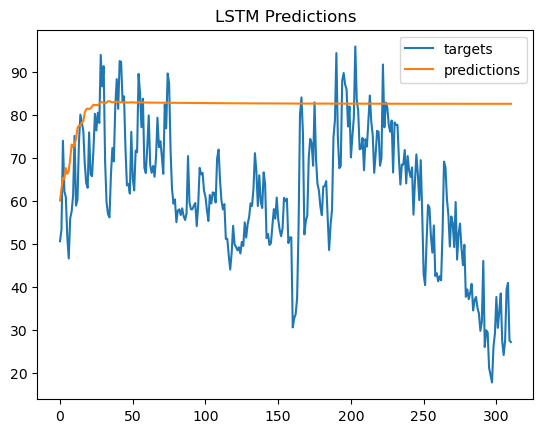

In [36]:
base_model.plot_validation_pred_target()

In [37]:
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_mase_results = mase_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column], training=base_model.X_train[0])
base_smape_metric = smape_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column])

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

MASE: {'mase': 268.6333904379972}
SMAPE: {'smape': 0.3246427507814596}


In [38]:
lstm_model = RnnModel(df, unit_type="lstm")

In [39]:
lstm_model.train(epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 7ms/step - loss: 0.0477
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 11/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 12/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 13/100
63/63 [=================

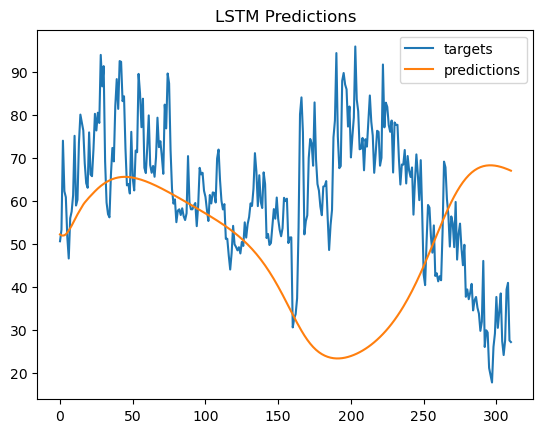

In [40]:
lstm_model.plot_validation_pred_target()

In [41]:
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

lstm_mase_results = mase_metric.compute(references=lstm_model.validation_target[:, lstm_model.target_column], predictions=lstm_model.validation_predictions[:, lstm_model.target_column], training=lstm_model.X_train[0])
lstm_smape_metric = smape_metric.compute(references=lstm_model.validation_target[:, lstm_model.target_column], predictions=lstm_model.validation_predictions[:, lstm_model.target_column])

print(f'MASE: {lstm_mase_results}')
print(f'SMAPE: {lstm_smape_metric}')

MASE: {'mase': 265.8028714817055}
SMAPE: {'smape': 0.40470064033035563}
